# 데이터 불러오기 및 한글 시각화

In [1]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.express as px
import cufflinks as cf
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
plt.style.use(['ggplot'])
mpl.font_manager._rebuild()

The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144487 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54620 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44544 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 53580 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49828 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 53944 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50857 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph

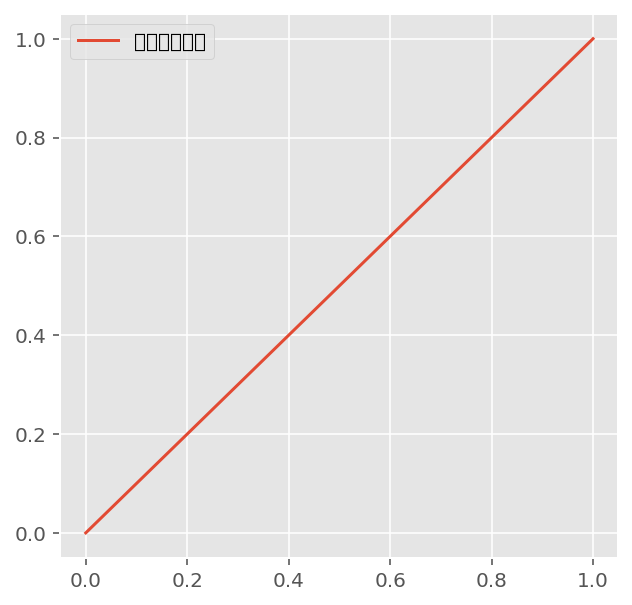

In [3]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

# 한글 안나오면 런타임 -> 다시시작 및 모두실행 클릭

In [4]:
ShinhanCard_2020 = pd.read_csv("//content/drive/My Drive/shinhan/SHcard/KCTI_NATIVE_2020.txt", sep='|', header=0, encoding="CP949")
ShinhanCard_2019 = pd.read_csv("//content/drive/My Drive/shinhan/SHcard/KCTI_NATIVE_2019.txt", sep='|', header=0, encoding="CP949")

In [ ]:
# shnot2020 = pd.concat([sh2017, sh2018, sh2019])

In [ ]:
sh2020['divide_usec'] = sh2020['usec'] / sh2020['usec'].sum()

In [ ]:
sh2020['divide_vlm'] = sh2020['vlm'] / sh2020['vlm'].sum()

In [ ]:
sh2020.head()

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec,divide_usec,divide_vlm
0,경기,세종,.,취미오락,유흥,M,40,202001,RED,휴식,6410700.0,45,9.918549e-09,4.060422e-08
1,경남,세종,.,스포츠활동,레저스포츠,M,30,202001,RED,활동,147900.0,15,3.306183e-09,9.367720e-10
2,광주,세종,.,취미오락,패션쇼핑,M,30,202001,RED,휴식,793050.0,5,1.102061e-09,5.023036e-09
3,인천,세종,.,취미오락,인터넷게임,M,30,202001,RED,취침,10200.0,10,2.204122e-09,6.460497e-11
4,경기,세종,.,취미오락,유흥,M,40,202001,RED,취침,382500.0,5,1.102061e-09,2.422686e-09


In [ ]:
sh2020['cln_age_r'].unique()

array([40, 30, 50, 20, 60])

# 지역만 추출해서 새로운 데이터 만들기

In [ ]:
def select_region(col, region):
    a = sh2020[sh2020[f'{col}'] == f'{region}']
    return a

# 수평그래프를 통해 다양한 변수 stack해서 살펴보기

In [ ]:
def graph1(name1, name2, name3, kind, size = 12):
    df1 = sh2020.groupby([f'{name1}',f'{name2}'])[f'{name3}'].sum()
    df2 = sh2020.groupby([f'{name1}'])[f'{name3}'].sum()
    df3 = df1/df2
    return df3.unstack().plot(kind = f"{kind}", stacked=True, fontsize=f'{size}')

<Figure size 864x576 with 0 Axes>

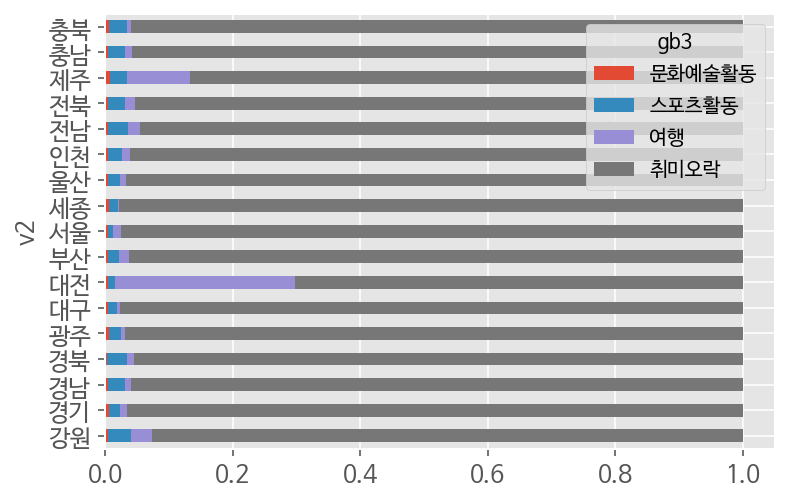

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(12,8))
graph1('v2', 'gb3', 'divide_usec', 'barh')
plt.show()
plt.savefig("gb3_v2.png")

<Figure size 864x576 with 0 Axes>

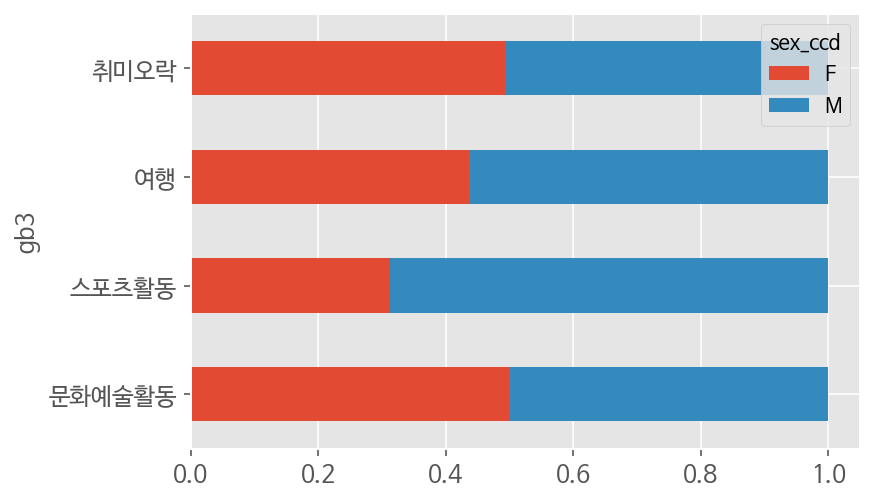

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(12,8))
graph1('gb3', 'sex_ccd', 'divide_usec', 'barh')
plt.show()
plt.savefig("gb3_sex.png")

<Figure size 864x576 with 0 Axes>

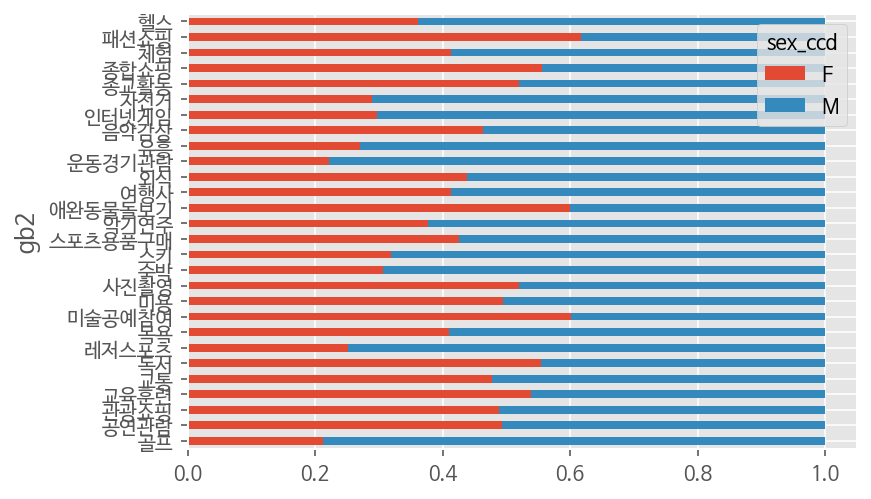

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(12,8))
graph1('gb2', 'sex_ccd', 'divide_usec', 'barh', 10)
plt.show()
plt.savefig("gb2_sex.png")

In [ ]:
sh2020.head()

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec,divide_usec,divide_vlm
0,경기,세종,.,취미오락,유흥,M,40,202001,RED,휴식,6410700.0,45,9.918549e-09,4.060422e-08
1,경남,세종,.,스포츠활동,레저스포츠,M,30,202001,RED,활동,147900.0,15,3.306183e-09,9.367720e-10
2,광주,세종,.,취미오락,패션쇼핑,M,30,202001,RED,휴식,793050.0,5,1.102061e-09,5.023036e-09
3,인천,세종,.,취미오락,인터넷게임,M,30,202001,RED,취침,10200.0,10,2.204122e-09,6.460497e-11
4,경기,세종,.,취미오락,유흥,M,40,202001,RED,취침,382500.0,5,1.102061e-09,2.422686e-09


# ta_ym에서 월만 빼서 열로 추가

In [ ]:
sh2020.head()

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec,divide_usec,divide_vlm
0,경기,세종,.,취미오락,유흥,M,40,202001,RED,휴식,6410700.0,45,9.918549e-09,4.060422e-08
1,경남,세종,.,스포츠활동,레저스포츠,M,30,202001,RED,활동,147900.0,15,3.306183e-09,9.367720e-10
2,광주,세종,.,취미오락,패션쇼핑,M,30,202001,RED,휴식,793050.0,5,1.102061e-09,5.023036e-09
3,인천,세종,.,취미오락,인터넷게임,M,30,202001,RED,취침,10200.0,10,2.204122e-09,6.460497e-11
4,경기,세종,.,취미오락,유흥,M,40,202001,RED,취침,382500.0,5,1.102061e-09,2.422686e-09


In [ ]:
sh2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5566988 entries, 0 to 5566987
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   v1              object 
 1   v2              object 
 2   v3              object 
 3   gb3             object 
 4   gb2             object 
 5   sex_ccd         object 
 6   cln_age_r       int64  
 7   ta_ym           int64  
 8   daw_ccd_r       object 
 9   apv_ts_dl_tm_r  object 
 10  vlm             float64
 11  usec            int64  
 12  divide_usec     float64
 13  divide_vlm      float64
dtypes: float64(3), int64(3), object(8)
memory usage: 594.6+ MB


In [ ]:
sh2020 = sh2020.astype({'ta_ym':'str'})

In [ ]:
sh2020['month']= sh2020['ta_ym'].str.slice(start=4, stop=6)

In [ ]:
sh2020.head()

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec,divide_usec,divide_vlm,month
0,경기,세종,.,취미오락,유흥,M,40,202001,RED,휴식,6410700.0,45,9.918549e-09,4.060422e-08,01
1,경남,세종,.,스포츠활동,레저스포츠,M,30,202001,RED,활동,147900.0,15,3.306183e-09,9.367720e-10,01
2,광주,세종,.,취미오락,패션쇼핑,M,30,202001,RED,휴식,793050.0,5,1.102061e-09,5.023036e-09,01
3,인천,세종,.,취미오락,인터넷게임,M,30,202001,RED,취침,10200.0,10,2.204122e-09,6.460497e-11,01
4,경기,세종,.,취미오락,유흥,M,40,202001,RED,취침,382500.0,5,1.102061e-09,2.422686e-09,01


# 다중 그래프 구현 

## 연령을 기준으로 소분류 별 카드 소비 순위 보기


In [ ]:
# s20 = df4[df4['cln_age_r'] == '20']
# s30 = df4[df4['cln_age_r'] == '30']
# s40 = df4[df4['cln_age_r'] == '40']
# s50 = df4[df4['cln_age_r'] == '50']
# s60 = df4[df4['cln_age_r'] == '60']

In [ ]:
df1 = sh2020.groupby(by=['cln_age_r', 'gb2'])['divide_usec'].sum()

KeyError: ignored

In [ ]:
df2 = sh2020.groupby(['cln_age_r'])['divide_usec'].sum()

In [ ]:
df3 = df1/df2

In [ ]:
df3

In [ ]:
df4 = df3.reset_index()

In [ ]:
df4

,cln_age_r,gb2,divide_usec
0,20,골프,0.000422
1,20,공연관람,0.006362
2,20,관광쇼핑,0.000903
3,20,교육훈련,0.001381
4,20,교통,0.017535
...,...,...,...
135,60,종교활동,0.000564
136,60,종합쇼핑,0.540031
137,60,체험,0.000954
138,60,패션쇼핑,0.015093


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



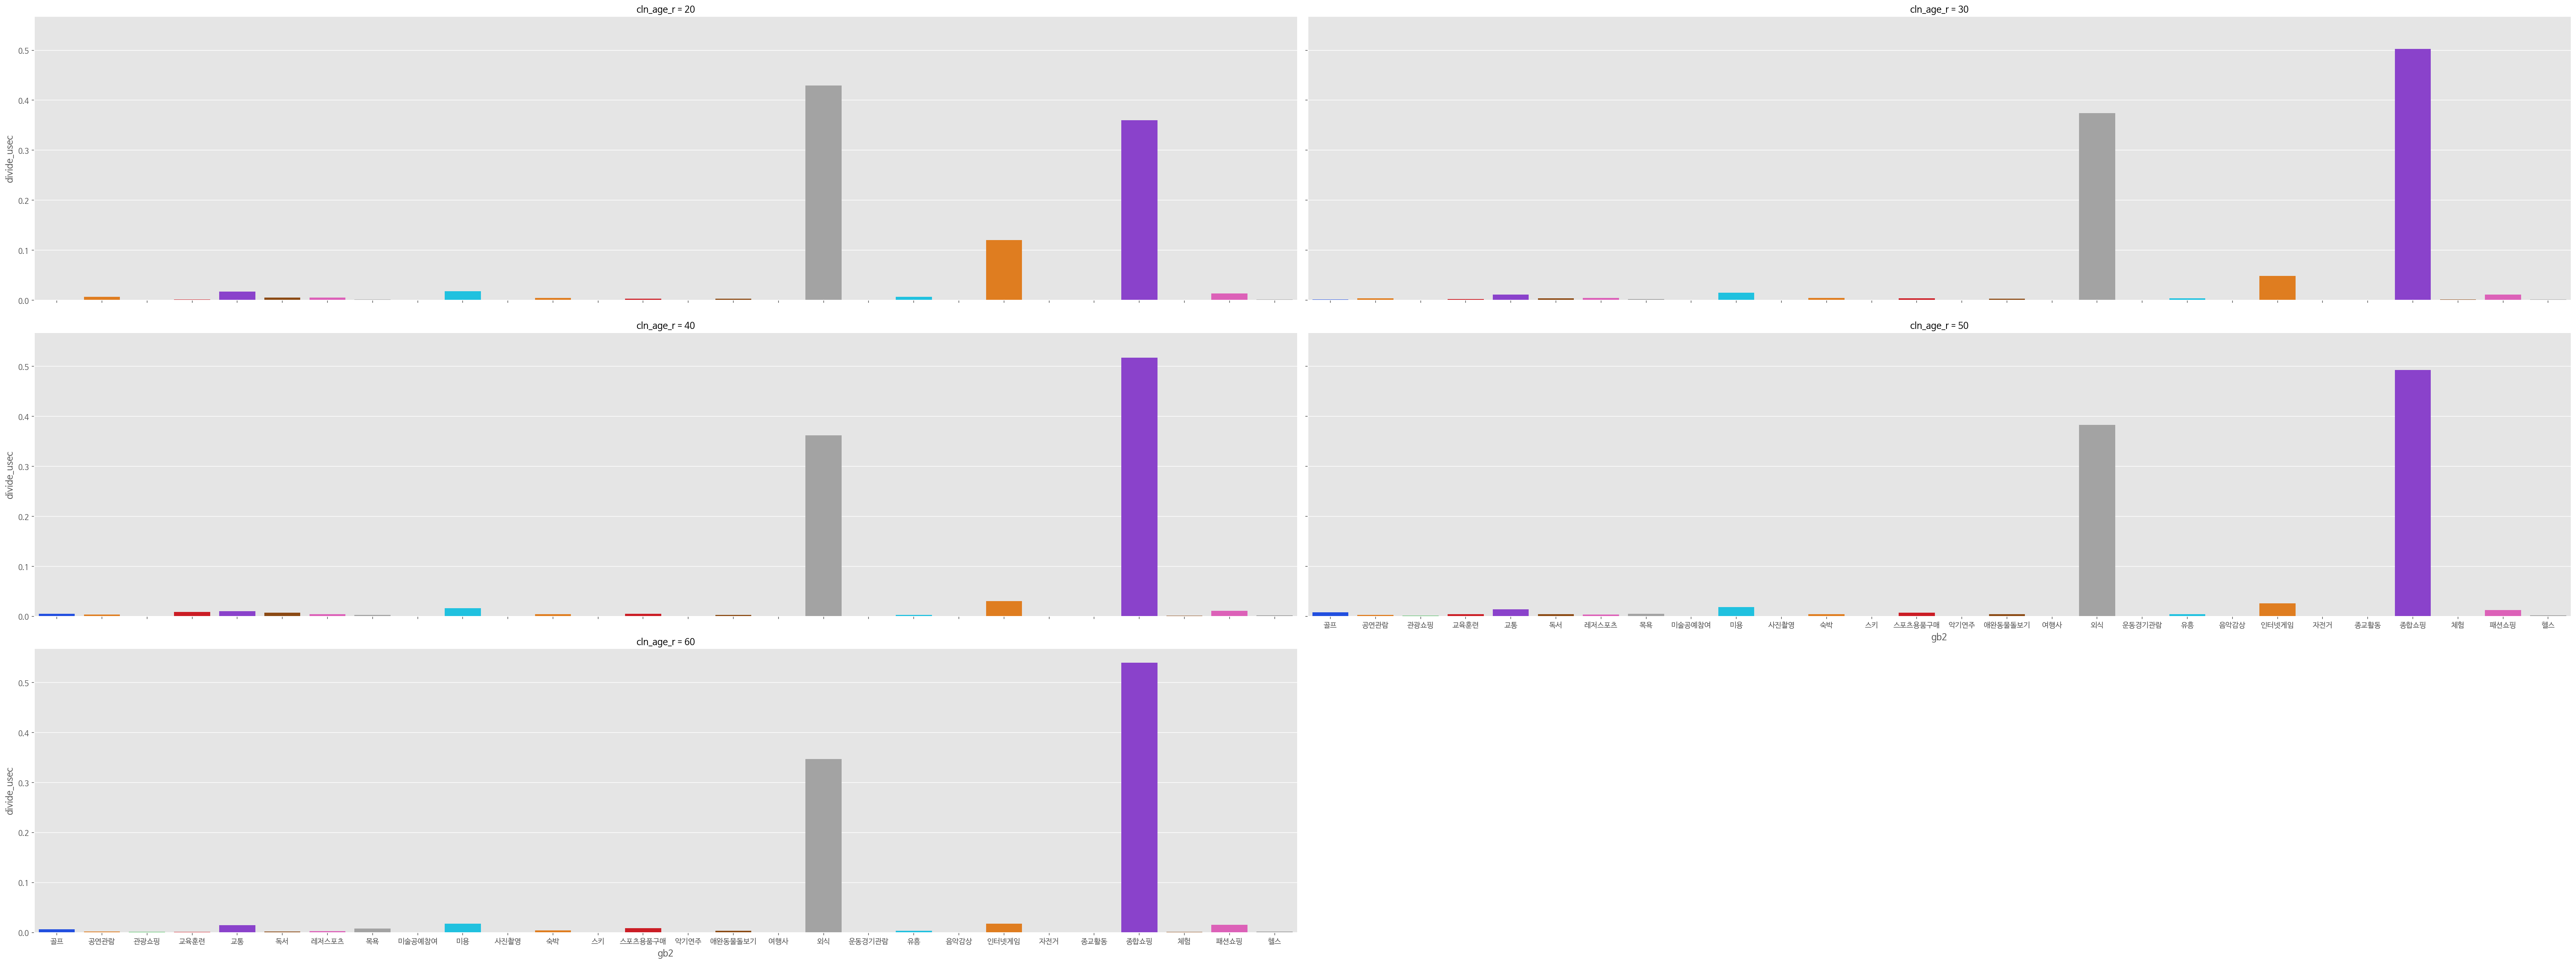

In [ ]:
g = sns.FacetGrid(df4, col = 'cln_age_r', col_wrap=2, size=6, aspect=4)
g = g.map(sns.barplot, 'gb2', "divide_usec", palette="bright")
g.savefig("연령을 기준으로 소분류 별 카드 소비 시각화")

## 2020 소분류를 기준으로 연령 대 카드 소비 횟수 보기

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



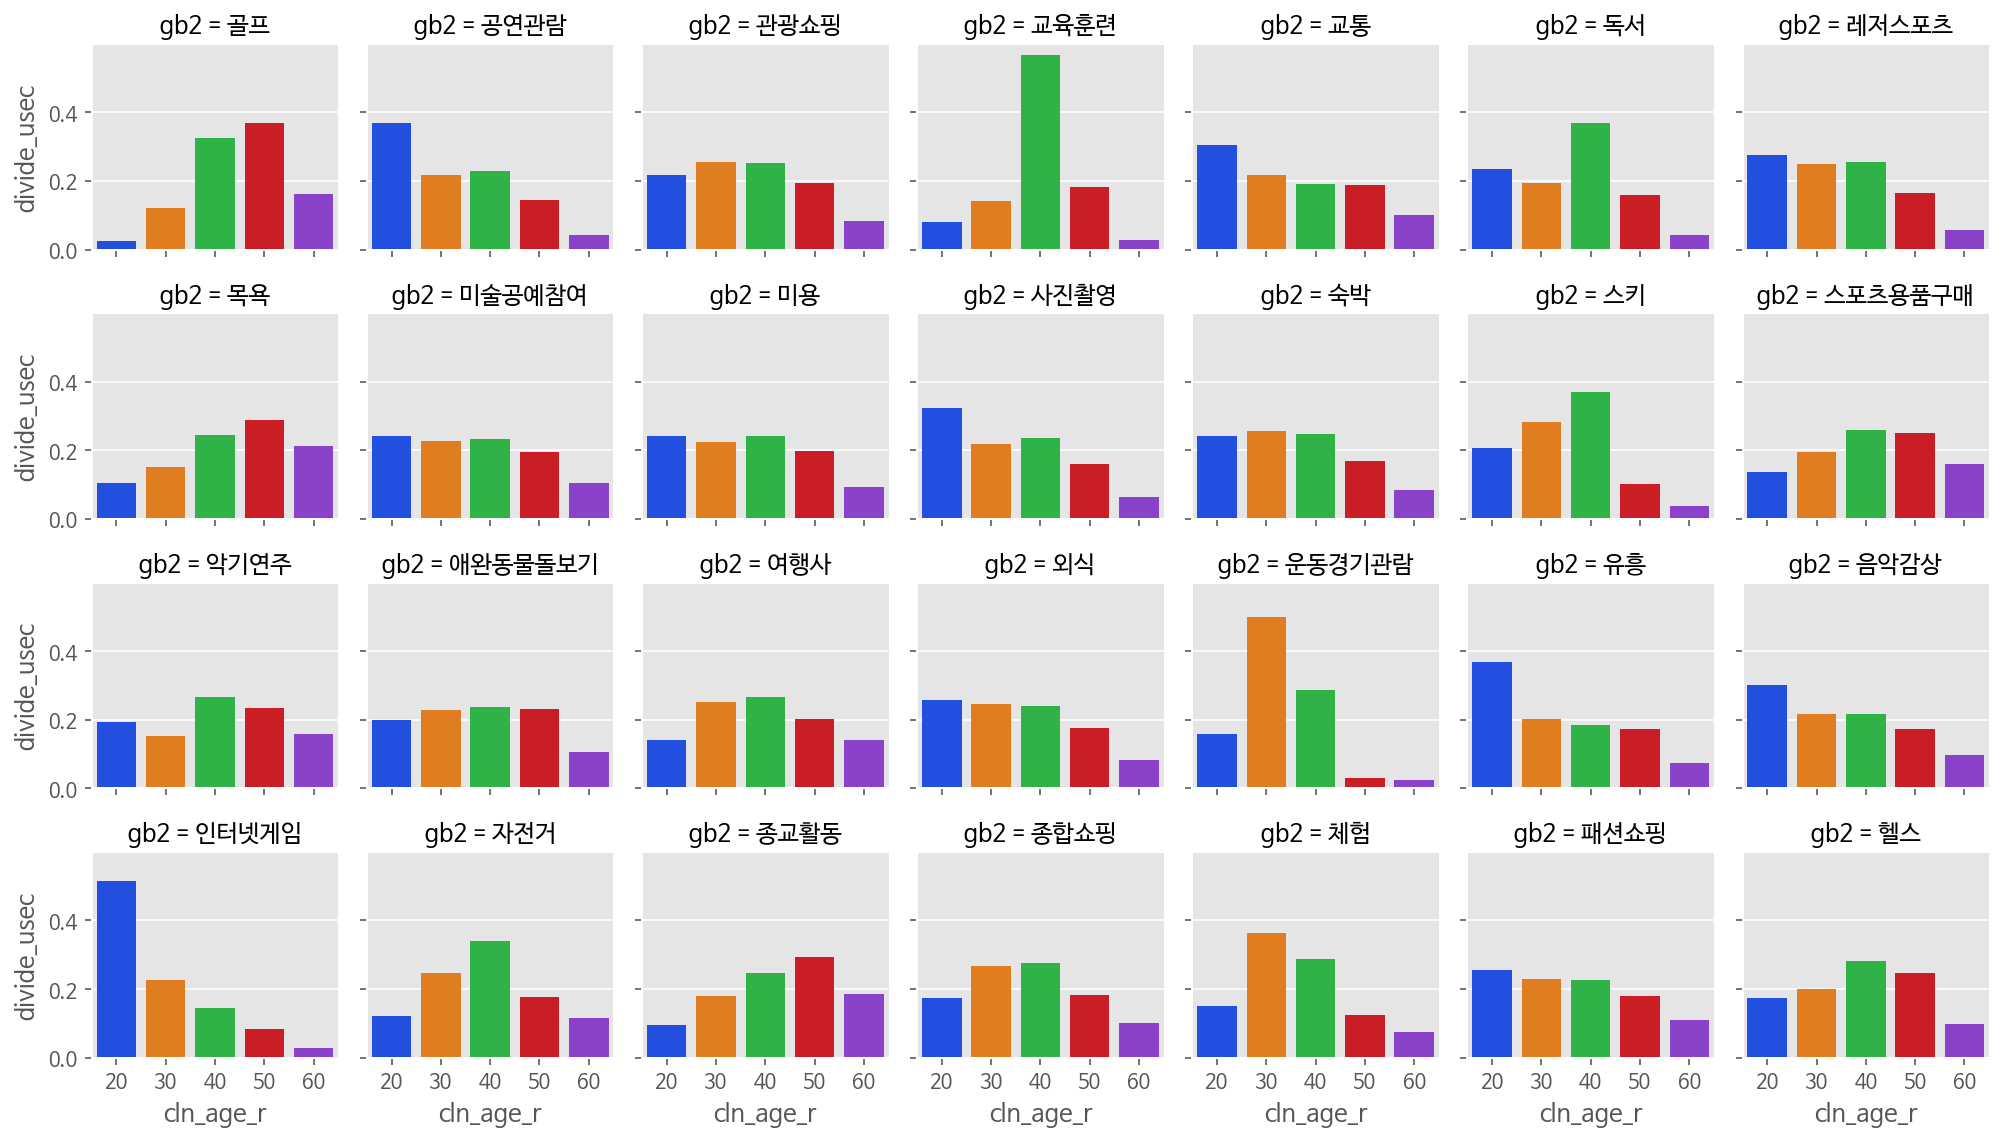

In [ ]:
df1 = sh2020.groupby(by=['gb2', 'cln_age_r'])['divide_usec'].sum()
df2 = sh2020.groupby(by=['gb2'])['divide_usec'].sum()
df3 = df1/df2
df4 = df3.reset_index()
g = sns.FacetGrid(df4, col = 'gb2', col_wrap=7, size=2)
g = g.map(sns.barplot, 'cln_age_r', "divide_usec", palette="bright")
g.savefig("소분류를 기준으로 연령 대 카드 소비 횟수.png")

## 성별을 기준으로 결제한 월 시각화

In [ ]:
def shinhan_facetgrid(col, x, y, col_number, size = 3, aspect = 1):
    df1 = sh2020.groupby(by=[f'{col}', f'{x}'])[f'{y}'].sum()
    df2 = sh2020.groupby(by=[f'{col}'])[f'{y}'].sum()
    df3 = df1/df2
    df4 = df3.reset_index()
    g = sns.FacetGrid(df4, col = f'{col}', col_wrap=int(f'{col_number}'), size=int(f'{size}'), aspect = int(f'{aspect}'))
    g = g.map(sns.barplot, f'{x}', f"{y}", palette="bright")
    return g

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



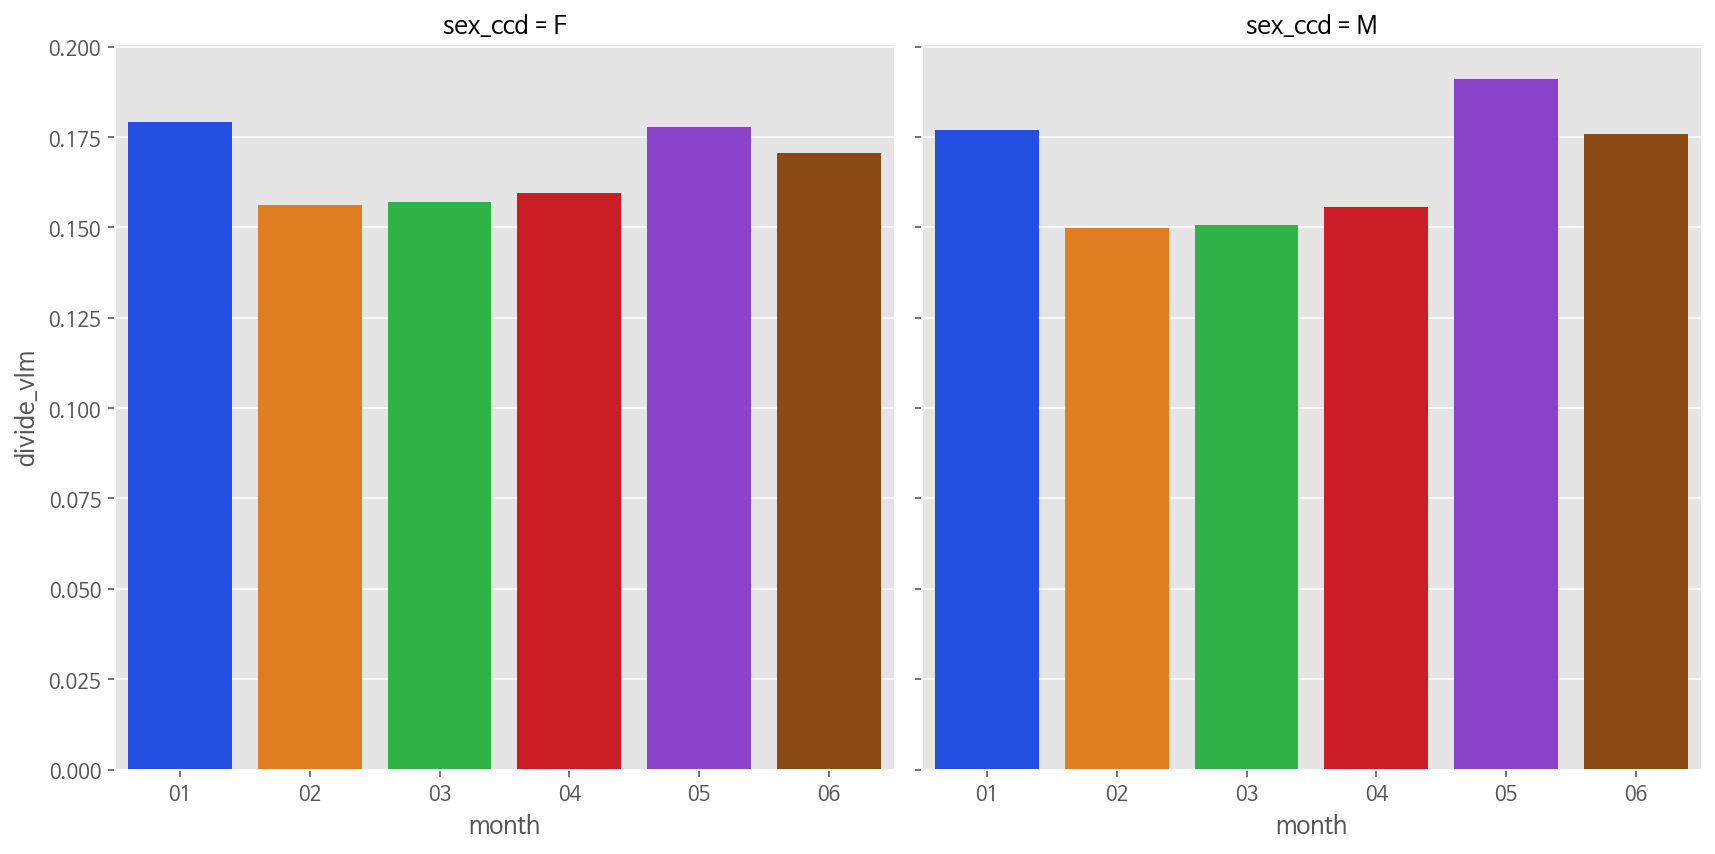

In [ ]:
a = shinhan_facetgrid('sex_ccd', 'month', 'divide_vlm', 2, 6)
a

In [ ]:
a.savefig("성별을 기준으로 카드 결제 월 단위 파악.png")

## 사는 지역을 기준으로 카드 결제한 지역 순위 시각화

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



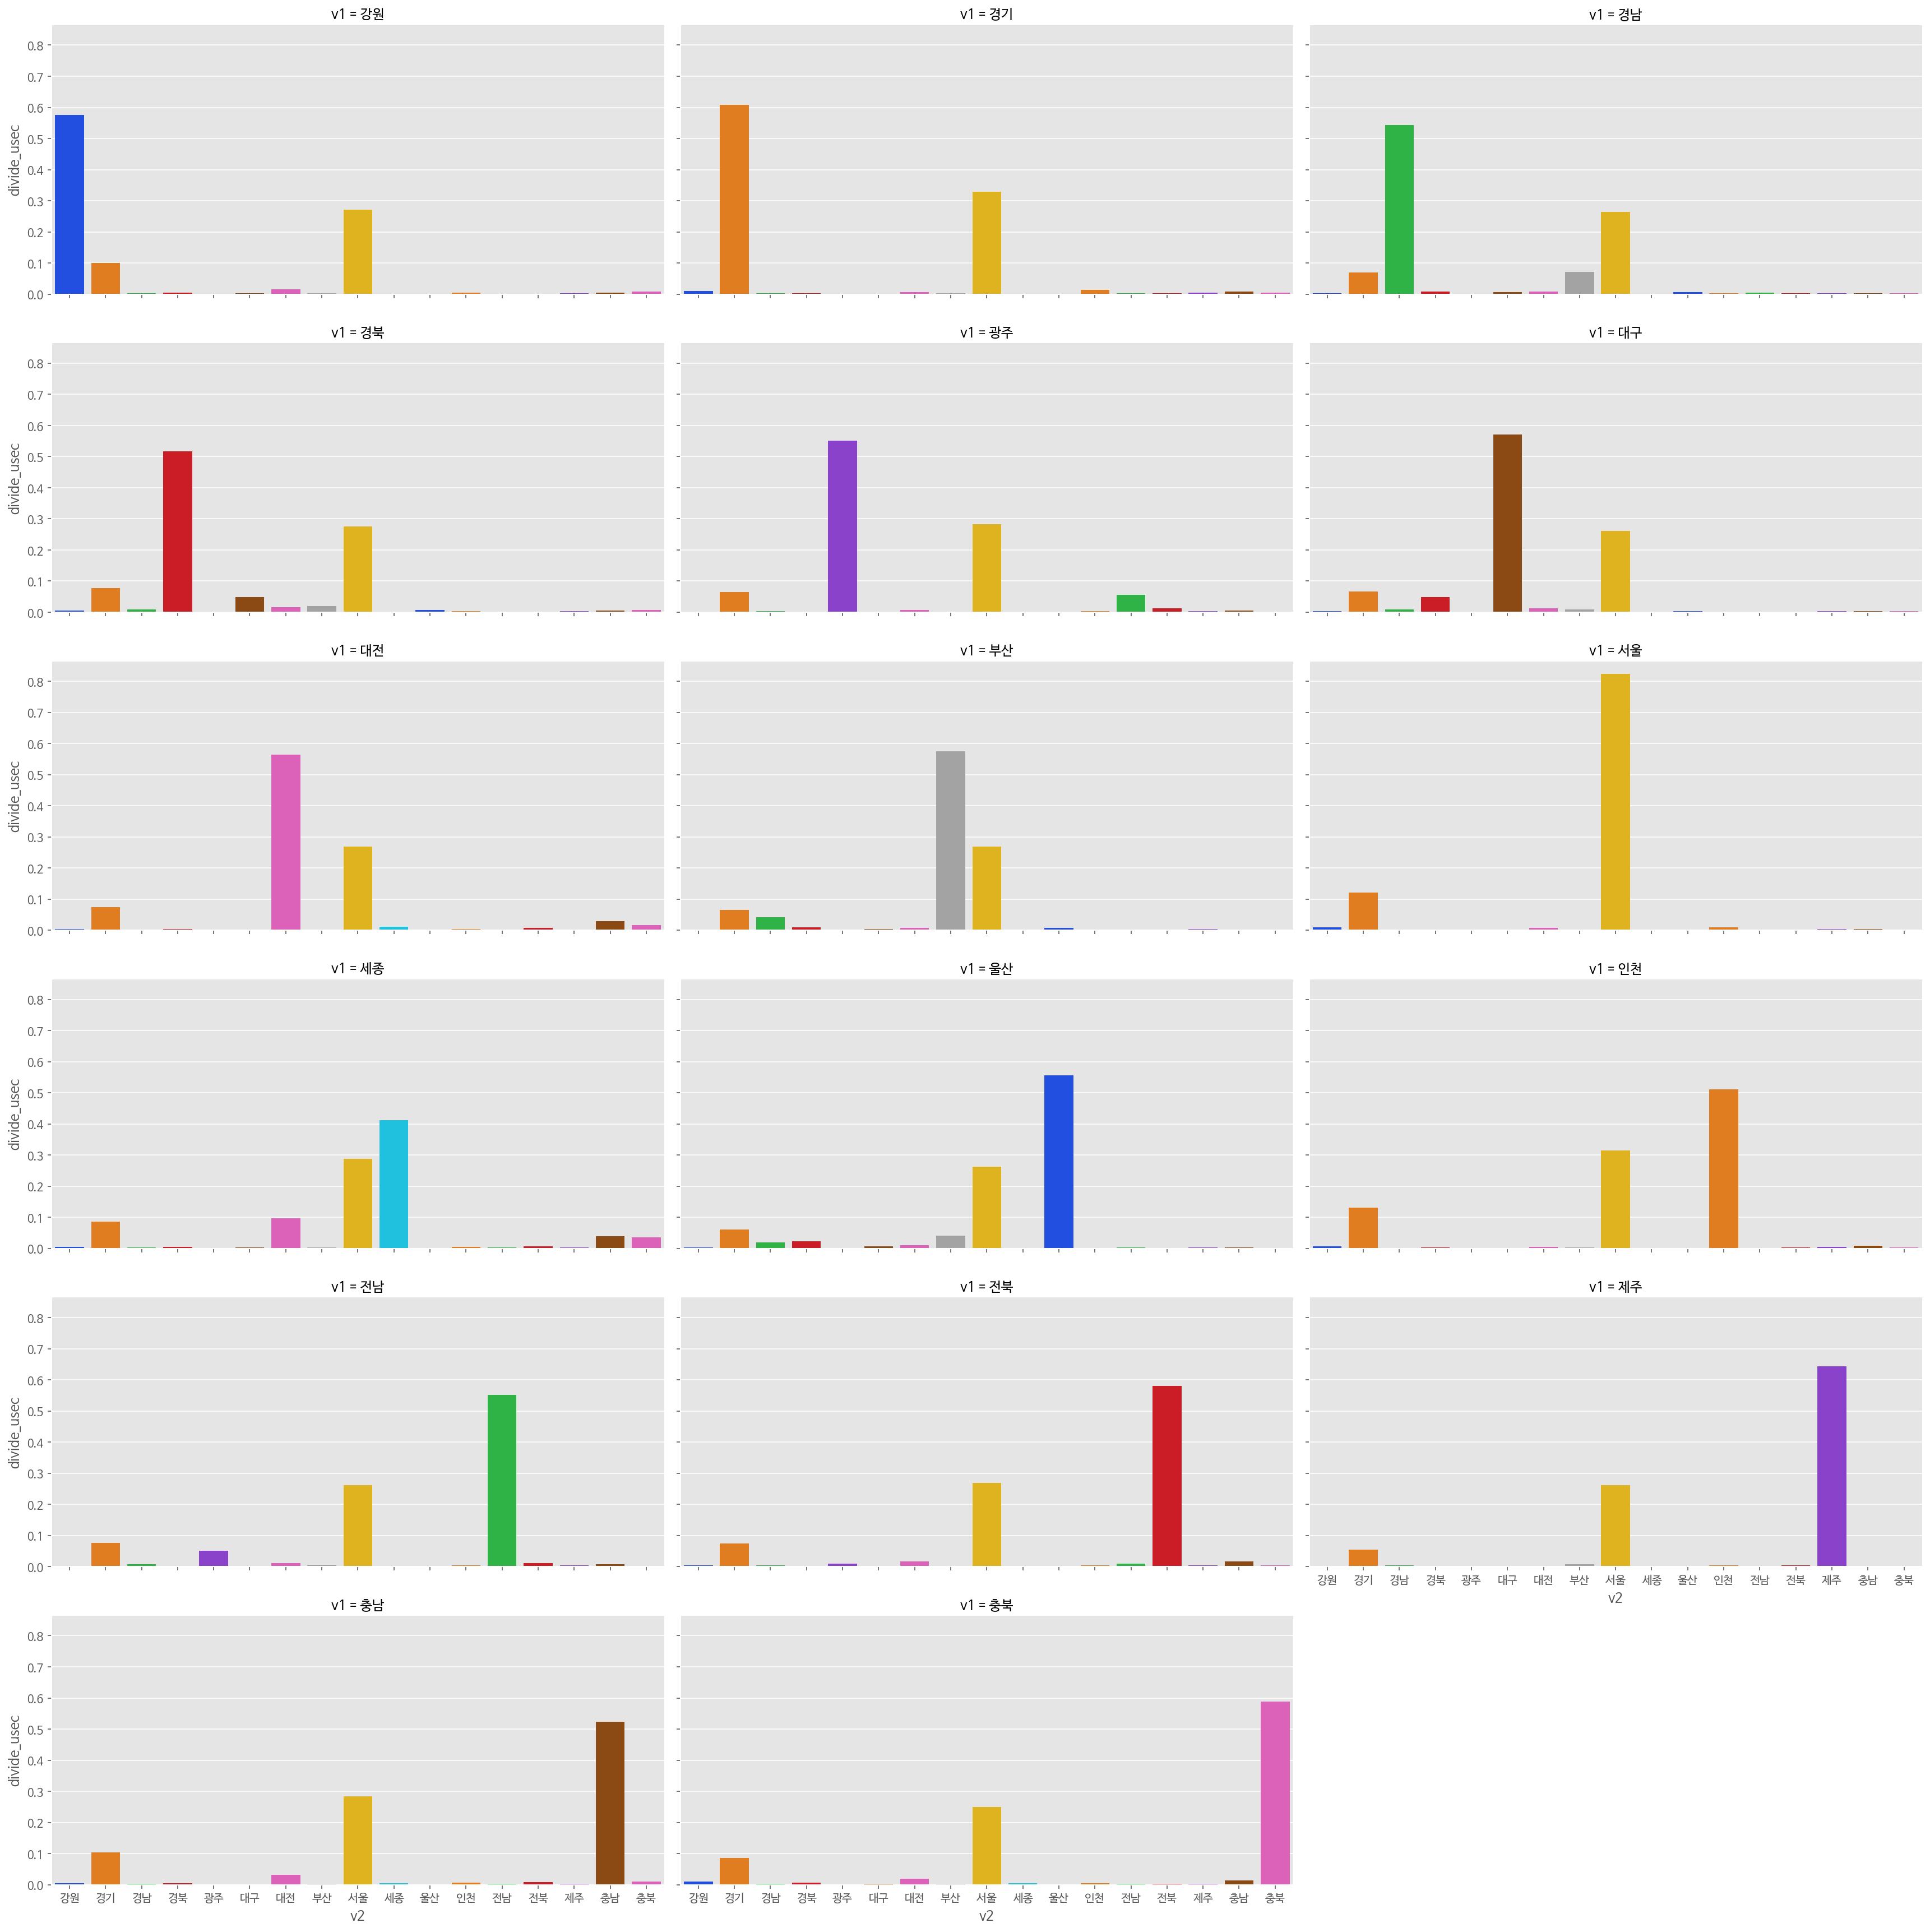

In [ ]:
a = shinhan_facetgrid('v1', 'v2', 'divide_usec', 3, 4, 2)
a

In [ ]:
a.savefig("사는 지역을 기준으로 카드 결제한 지역 순위 시각화.png")

## 지역을 기준으로 소분류 소비건수 시각화 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



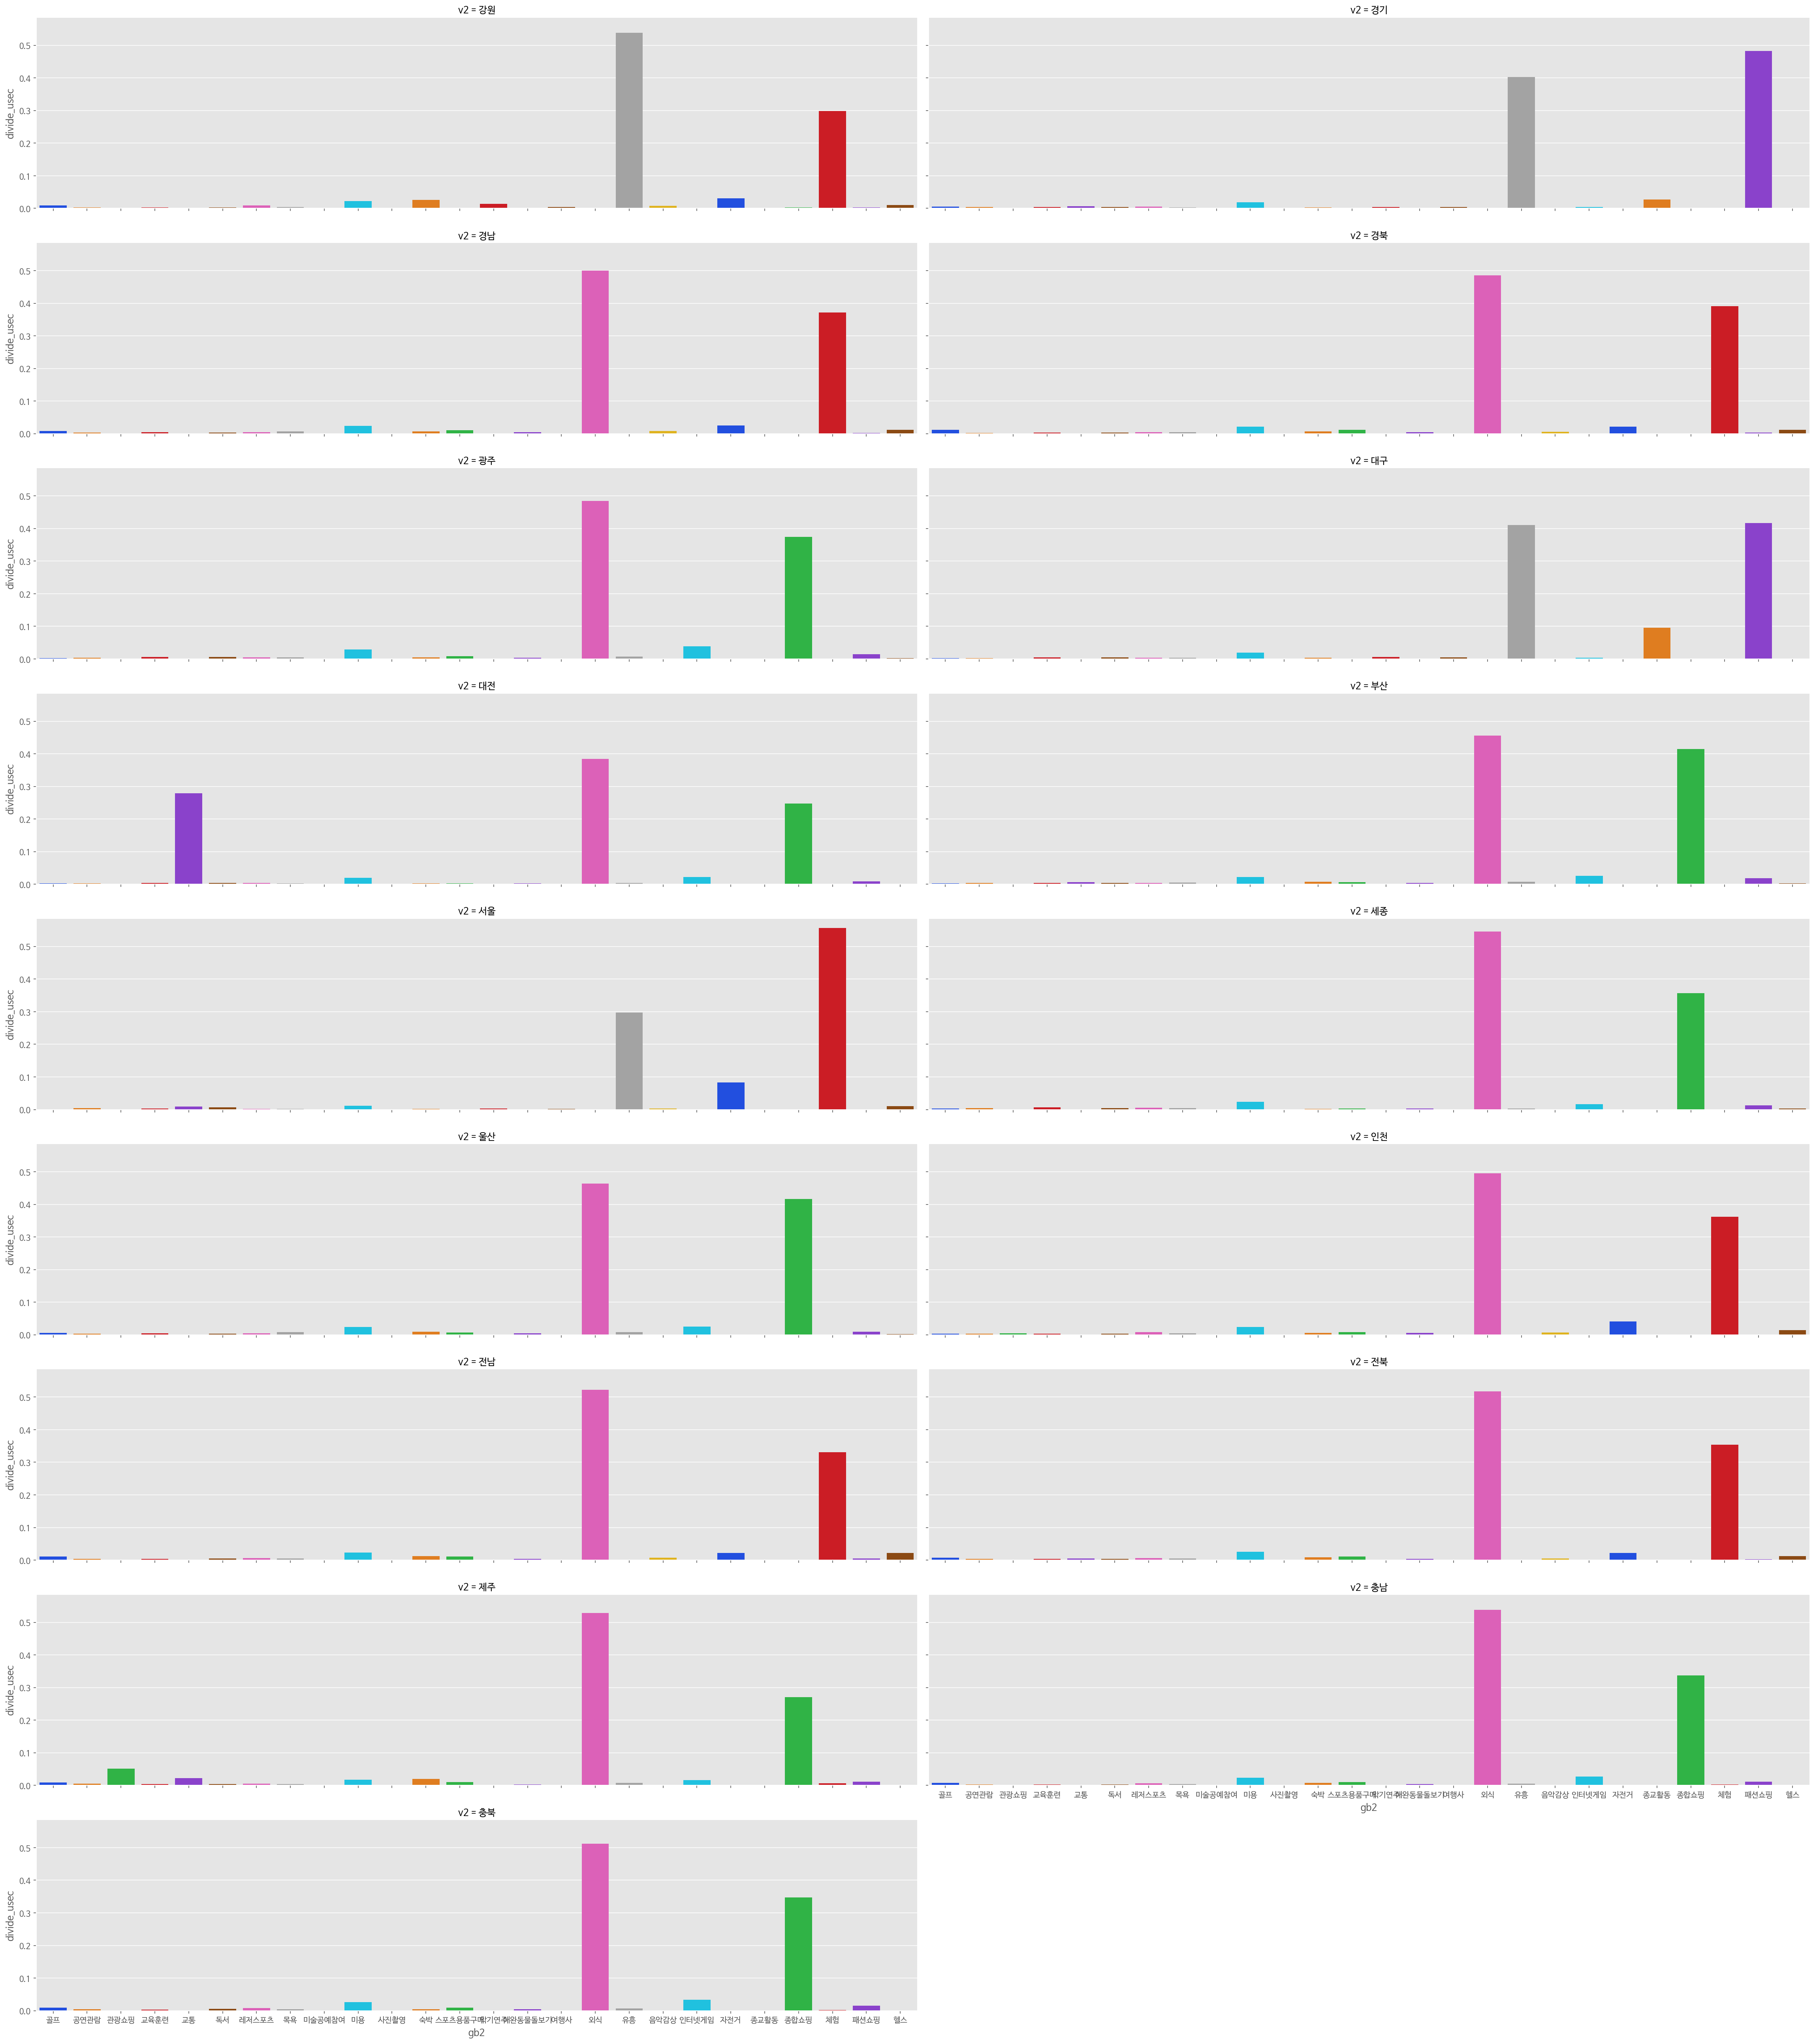

In [ ]:
a = shinhan_facetgrid('v2', 'gb2', 'divide_usec', 2, 4, 4)

In [ ]:
a.savefig("지역을 기준으로 소분류 소비건수 시각화.png")

## 나이대 기준으로 지역 소비 건수 시각화

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



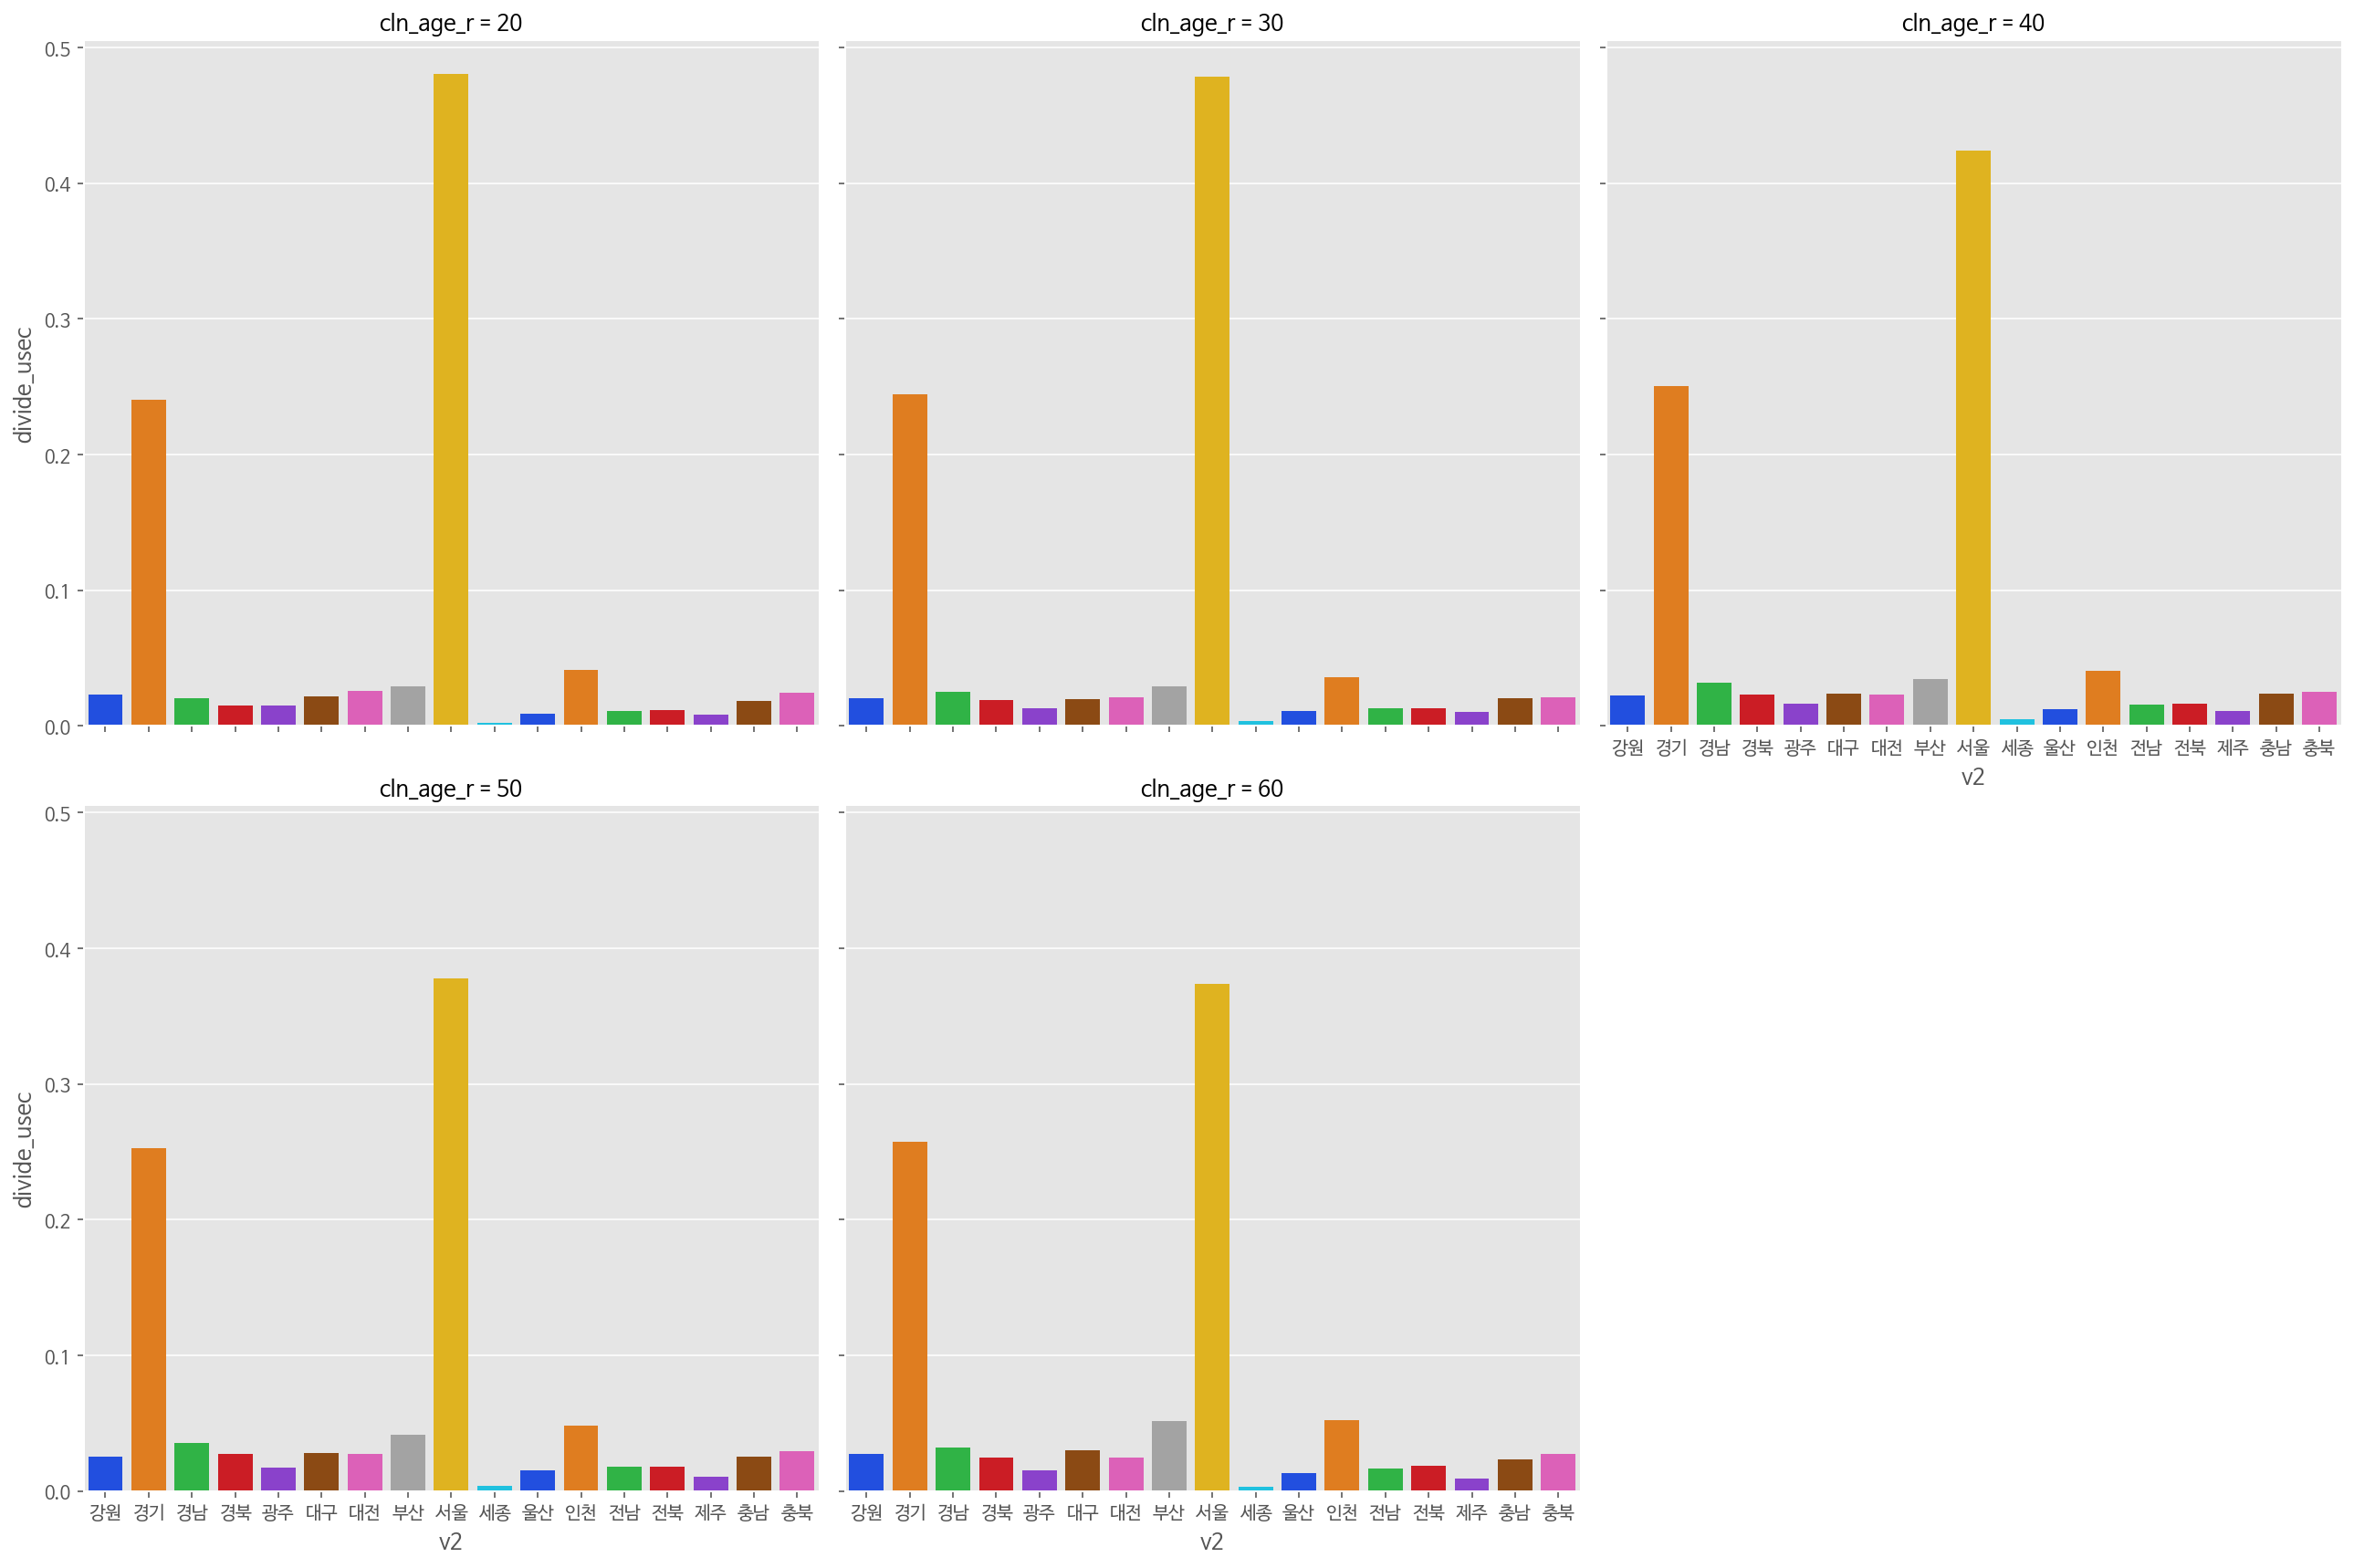

In [ ]:
a = shinhan_facetgrid('cln_age_r', 'v2', 'divide_usec', 3, 6)
a

In [ ]:
a.savefig("나이대 기준으로 지역 소비 건수 시각화.png")

# 제주

In [ ]:
jeju = select_region("v2", '제주')

In [ ]:
jeju_copy = jeju.copy()

In [ ]:
jeju_copy.head()

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec,divide_usec,divide_vlm,month
3068,인천,제주,제주시,문화예술활동,미술공예참여,F,30,202001,WHITE,활동,461550.0,10,2.204122e-09,2.923375e-09,01
3069,경북,제주,제주시,취미오락,교육훈련,F,20,202001,WHITE,휴식,22950.0,5,1.102061e-09,1.453612e-10,01
3070,광주,제주,제주시,취미오락,미용,M,30,202001,RED,활동,484500.0,20,4.408244e-09,3.068736e-09,01
3071,전북,제주,제주시,취미오락,미용,M,50,202001,RED,활동,102000.0,5,1.102061e-09,6.460497e-10,01
3072,전남,제주,제주시,여행,체험,M,50,202001,RED,활동,828750.0,25,5.510305e-09,5.249153e-09,01


# 신한카드 데이터 전처리

In [41]:
ShinhanCard_2020 = pd.read_csv("//content/drive/My Drive/shinhan/SHcard/KCTI_NATIVE_2020.txt", sep='|', header=0, encoding="CP949")
ShinhanCard_2019 = pd.read_csv("//content/drive/My Drive/shinhan/SHcard/KCTI_NATIVE_2019.txt", sep='|', header=0, encoding="CP949")

In [43]:
ShinhanCard_2019_copy = ShinhanCard_2019.copy()

## gb2 종합쇼핑, 패션쇼핑, 관광쇼핑 -> 쇼핑으로 통합

In [52]:
ShinhanCard_2019.gb2.unique()

array(['종합쇼핑', '외식', '목욕', '레저스포츠', '미용', '패션쇼핑', '헬스', '애완동물돌보기', '공연관람',
       '유흥', '숙박', '사진촬영', '교육훈련', '체험', '인터넷게임', '독서', '골프', '미술공예참여',
       '스포츠용품구매', '여행사', '관광쇼핑', '종교활동', '음악감상', '악기연주', '교통', '자전거',
       '스키', '운동경기관람'], dtype=object)

In [53]:
ShinhanCard_2019_copy['gb2'] = ShinhanCard_2019_copy['gb2'].replace(['종합쇼핑', '관광쇼핑', '패션쇼핑'], '쇼핑')
ShinhanCard_2019_copy.gb2.unique()

## 여행 활동과 맞지 않은 행 제거

In [49]:
# mask = ShinhanCard_2019_copy['gb2'].isin(['인터넷게임', '종교활동', '교통', '숙박', '헬스', '여행사', '미용', '독서', '애완동물 돌보기'])
# ShinhanCard_2019_copy[~mask].head()
ShinhanCard_2019_copy.gb2.unique()
mask = ShinhanCard_2019_copy['gb2'].isin(['인터넷게임', '종교활동', '교통', '숙박', '헬스',
                                          '여행사', '미용', '독서', '애완동물 돌보기'])
ShinhanCard_2019_drop_NotTravelActivity = ShinhanCard_2019_copy[~mask]
ShinhanCard_2019_copy[~mask].gb2.unique()

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec
0,세종,세종,.,취미오락,쇼핑,M,40,201901,WHITE,활동,1.878919e+09,63579
1,대전,세종,.,취미오락,외식,M,20,201901,WHITE,휴식,6.945233e+07,2952
2,서울,세종,.,취미오락,외식,F,40,201901,RED,휴식,9.267020e+06,286
3,경남,세종,.,취미오락,쇼핑,M,50,201901,RED,휴식,6.034990e+05,20
4,충북,세종,.,취미오락,쇼핑,F,40,201901,WHITE,활동,1.076389e+08,2379


## 2020년 남자 20대 소비 횟수 상위 top 3 보기

In [56]:
ShinhanCard_2020_copy = ShinhanCard_2020.copy()

ShinhanCard_2020_copy['gb2'] = ShinhanCard_2020_copy['gb2'].replace(['종합쇼핑', '관광쇼핑', '패션쇼핑'], '쇼핑')
ShinhanCard_2020_copy.gb2.unique()

# mask = ShinhanCard_2019_copy['gb2'].isin(['인터넷게임', '종교활동', '교통', '숙박', '헬스', '여행사', '미용', '독서', '애완동물 돌보기'])
# ShinhanCard_2019_copy[~mask].head()
ShinhanCard_2020_copy.gb2.unique()
mask = ShinhanCard_2020_copy['gb2'].isin(['인터넷게임', '종교활동', '교통', '숙박', '헬스',
                                          '여행사', '미용', '독서', '애완동물 돌보기'])
ShinhanCard_2020_drop_NotTravelActivity = ShinhanCard_2020_copy[~mask]

array(['유흥', '레저스포츠', '쇼핑', '스포츠용품구매', '목욕', '공연관람', '골프', '애완동물돌보기',
       '외식', '체험', '자전거', '교육훈련', '사진촬영', '미술공예참여', '음악감상', '악기연주', '스키',
       '운동경기관람'], dtype=object)

In [61]:
df1 = ShinhanCard_2020_drop_NotTravelActivity[ShinhanCard_2020_drop_NotTravelActivity['sex_ccd'] == 'M']

In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229340 entries, 0 to 5566987
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   v1              object 
 1   v2              object 
 2   v3              object 
 3   gb3             object 
 4   gb2             object 
 5   sex_ccd         object 
 6   cln_age_r       int64  
 7   ta_ym           int64  
 8   daw_ccd_r       object 
 9   apv_ts_dl_tm_r  object 
 10  vlm             float64
 11  usec            int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 221.1+ MB


In [72]:
Shinhan_M_20 = df1[df1['cln_age_r'] == 20]

In [73]:
Shinhan_M_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487193 entries, 7 to 5566974
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   v1              487193 non-null  object 
 1   v2              487193 non-null  object 
 2   v3              487193 non-null  object 
 3   gb3             487193 non-null  object 
 4   gb2             487193 non-null  object 
 5   sex_ccd         487193 non-null  object 
 6   cln_age_r       487193 non-null  int64  
 7   ta_ym           487193 non-null  int64  
 8   daw_ccd_r       487193 non-null  object 
 9   apv_ts_dl_tm_r  487193 non-null  object 
 10  vlm             487193 non-null  float64
 11  usec            487193 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 48.3+ MB


In [74]:
Shinhan_M_20 = Shinhan_M_20.astype({'cln_age_r':'str'})

In [75]:
Shinhan_M_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487193 entries, 7 to 5566974
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   v1              487193 non-null  object 
 1   v2              487193 non-null  object 
 2   v3              487193 non-null  object 
 3   gb3             487193 non-null  object 
 4   gb2             487193 non-null  object 
 5   sex_ccd         487193 non-null  object 
 6   cln_age_r       487193 non-null  object 
 7   ta_ym           487193 non-null  int64  
 8   daw_ccd_r       487193 non-null  object 
 9   apv_ts_dl_tm_r  487193 non-null  object 
 10  vlm             487193 non-null  float64
 11  usec            487193 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 48.3+ MB


In [76]:
Shinhan_M_20.head()

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec
7,서울,세종,.,취미오락,목욕,M,20,202001,WHITE,취침,54570.0,10
11,경북,세종,.,스포츠활동,골프,M,20,202001,WHITE,휴식,3590400.0,10
22,제주,광주,남구,취미오락,쇼핑,M,20,202001,RED,휴식,30600.0,5
37,인천,울산,남구,문화예술활동,공연관람,M,20,202001,RED,활동,122910.0,10
52,경기,부산,남구,취미오락,교육훈련,M,20,202001,WHITE,활동,259590.0,10


# 여행 만족도 데이터 전처리

In [78]:
travel_satisfaction = pd.read_csv("/content/2019년 국민여행조사(국내여행).csv", encoding='CP949')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (29,113,185,269) have mixed types.Specify dtype option on import or set low_memory=False.



In [91]:
travel_satisfaction

,Unnamed: 0,ID,Q,MON_EXP_1,MON_EXP_2,MON_EXP_3,MON_EXP_4,MON_EXP_5,MON_EXP_6,S5,S5A_1,S5A_2,S5A_3,S5A_4,S5A_5,S5A_6,S5A_7,D_TRA1_CHECK,D_TRA1_SYEAR,D_TRA1_SMONTH,D_TRA1_SDAY,D_TRA1_EYEAR,D_TRA1_EMONTH,D_TRA1_EDAY,D_TRA1_S_Day,D_TRA1_COST,D_TRA1_NUM,D_TRA1_ONE_COST,D_TRA1_VAC,D_TRA1_TS2C,D_TRA1_CASE,D_TRA1_1_SYEAR,D_TRA1_1_SMONTH,D_TRA1_1_SDAY,D_TRA1_1_EYEAR,D_TRA1_1_EMONTH,D_TRA1_1_EDAY,D_TRA1_2_SYEAR,D_TRA1_2_SMONTH,D_TRA1_2_SDAY,...,A11D_5,A11D_6,A11E_1,A11E_2,A11E_3,A11F_1,A11F_2,A11F_3,A11F_4,A12,A13,A14,DQ1,DQ1A,DQ2,DQ2A,DQ3,DQ3A_1,DQ3A_2,DQ3A_3,DQ3A_4,DQ4,DQ4A,DQ4B,DQ4C,DQ4CA,DQ5,DQ5AA_1,DQ5AA_2,DQ5AB,DQ5AC,DQ5AD,DQ5B,DQ6A,DQ6B,DQ7,BSEX,BAGE,BARA,WT_DOM
0,1,11010550341_1000000,1,1,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,2018.0,12.0,31.0,2019.0,1.0,1.0,1.0,2168800.0,4.0,542200.0,2.0,NaN,1.0,2018.0,12.0,31.0,2019.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,6,1.0,1,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,4.0,NaN,1.0,60.0,2.0,NaN,4.0,4.0,1.0,1.0,3.0,11.0,14517.015410
1,2,11010550341_1000005,1,1,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,2019.0,1.0,18.0,2019.0,1.0,20.0,2.0,280000.0,1.0,280000.0,1.0,NaN,1.0,2019.0,1.0,18.0,2019.0,1.0,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,4.0,6,1.0,3,0.0,2,NaN,0.0,0.0,1.0,1,NaN,NaN,NaN,NaN,1,2.0,NaN,1.0,48.0,1.0,NaN,12.0,12.0,1.0,1.0,5.0,11.0,15542.565587
2,3,11010550341_1000007,2,1,2,2,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,2019.0,1.0,1.0,2019.0,1.0,3.0,2.0,345500.0,1.0,345500.0,2.0,NaN,1.0,2019.0,1.0,1.0,2019.0,1.0,3.0,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,4.0,6,2.0,4,0.0,1,Y,0.0,0.0,0.0,2,2.0,1.0,6.0,1.0,2,NaN,NaN,NaN,NaN,NaN,2.0,1.0,12.0,1.0,1.0,1.0,11.0,4370.695363
3,4,11010550341_1000012,1,1,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,2019.0,1.0,25.0,2019.0,1.0,27.0,2.0,300000.0,3.0,100000.0,1.0,NaN,1.0,2019.0,1.0,25.0,2019.0,1.0,27.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,6,1.0,3,1.0,2,NaN,0.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1,3.0,NaN,1.0,48.0,1.0,NaN,8.0,8.0,1.0,1.0,4.0,11.0,11802.148934
4,5,11010550341_1000013,1,1,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,2019.0,1.0,10.0,2019.0,1.0,13.0,3.0,1425000.0,2.0,712500.0,1.0,NaN,1.0,2019.0,1.0,10.0,2019.0,1.0,13.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,6,1.0,1,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,3.0,5.0,5.0,1.0,1.0,6.0,11.0,11294.917024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,2428,11130761721_1321552,1,1,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,2019.0,11.0,23.0,2019.0,11.0,23.0,0.0,240800.0,2.0,120400.0,NaN,NaN,1.0,2019.0,11.0,23.0,2019.0,11.0,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,6,1.0,2,0.0,2,Y,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,1,3.0,NaN,1.0,40.0,1.0,NaN,5.0,8.0,1.0,1.0,3.0,11.0,16114.050917
2428,2429,11130761721_1321563,0,2,2,2,2,2,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1.0,2,0.0,2,Y,0.0,0.0,0.0,2,1.0,1.0,4.0,1.0,2,NaN,NaN,NaN,NaN,NaN,1.0,1.0,4.0,1.0,2.0,7.0,11.0,13712.097537
2429,2430,11130763101_1353119,0,2,2,2,2,2,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1.0,4,0.0,2,NaN,0.0,0.0,2.0,2,1.0,1.0,4.0,1.0,1,5.0,NaN,4.0,40.0,2.0,NaN,2.0,9.0,1.0,2.0,5.0,11.0,10178.966150
2430,2431,11130763101_1353121,1,1,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,2019.0,12.0,25.0,2019.0,12.0,25.0,0.0,150000.0,2.0,75000.0,NaN,NaN,1.0,2019.0,12.0,25.0,2019.0,12.0,25.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 성별, 연령, 만족도, 여행활동 열만 추출

### 만족도 nan 행은 0으로 전처리

In [130]:
a = travel_satisfaction.iloc[:,729:750]
print(a.head())
a = a.fillna(0)
print(a.head())

   A3_1  A3_2  A3_3  A3_4  A3_5  A3_6  ...  A3_16  A3_17  A3_18  A3_19  A3_20  A3_21
0   1.0   2.0   NaN   NaN   NaN   NaN  ...    NaN    NaN   18.0    NaN    NaN    NaN
1   1.0   2.0   NaN   NaN   NaN   6.0  ...    NaN    NaN    NaN    NaN    NaN    NaN
2   1.0   2.0   3.0   NaN   NaN   6.0  ...    NaN    NaN    NaN    NaN    NaN    NaN
3   1.0   2.0   3.0   NaN   NaN   NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN
4   1.0   2.0   3.0   NaN   NaN   6.0  ...    NaN    NaN   18.0    NaN    NaN    NaN

[5 rows x 21 columns]
   A3_1  A3_2  A3_3  A3_4  A3_5  A3_6  ...  A3_16  A3_17  A3_18  A3_19  A3_20  A3_21
0   1.0   2.0   0.0   0.0   0.0   0.0  ...    0.0    0.0   18.0    0.0    0.0    0.0
1   1.0   2.0   0.0   0.0   0.0   6.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
2   1.0   2.0   3.0   0.0   0.0   6.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
3   1.0   2.0   3.0   0.0   0.0   0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
4   1.0   2.0   3.0   0.0   0.0   6.0  ...

### 만족도 3가지 부분 합쳐서 올림을 사용하여 한 열로 만들기

In [131]:
b = travel_satisfaction.iloc[:,986:989]
print(b.head())
b = b.fillna(0)
b['score'] = np.ceil((b['A12'] + b['A13'] + b['A14'])/3) 
b.drop(['A12','A13','A14'], axis = 1, inplace=True)
print(b.head())

   A12  A13  A14
0  4.0  4.0  4.0
1  4.0  5.0  4.0
2  4.0  5.0  4.0
3  4.0  4.0  4.0
4  4.0  4.0  4.0
   score
0    4.0
1    5.0
2    5.0
3    4.0
4    4.0


### 성별, 연령별 결측치 제거 

In [128]:
c = travel_satisfaction.iloc[:,1013:1015]
c = c.dropna()
c

,BSEX,BAGE
0,1.0,3.0
1,1.0,5.0
2,1.0,1.0
3,1.0,4.0
4,1.0,6.0
...,...,...
2426,1.0,6.0
2427,1.0,3.0
2428,2.0,7.0
2429,2.0,5.0


In [123]:
new_satisfaction = pd.concat([c,b,a], axis = 1)

In [124]:
new_satisfaction

,BSEX,BAGE,score,A3_1,A3_2,A3_3,A3_4,A3_5,A3_6,A3_7,A3_8,A3_9,A3_10,A3_11,A3_12,A3_13,A3_14,A3_15,A3_16,A3_17,A3_18,A3_19,A3_20,A3_21
0,1.0,3.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0
1,1.0,5.0,5.0,1.0,2.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,5.0,1.0,2.0,3.0,0.0,0.0,6.0,7.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,4.0,4.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,6.0,4.0,1.0,2.0,3.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,1.0,3.0,4.0,0.0,2.0,3.0,0.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2428,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2429,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2430,2.0,2.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
new_satisfaction.drop([2431], inplace=True)

In [133]:
new_satisfaction.head()

,BSEX,BAGE,score,A3_1,A3_2,A3_3,A3_4,A3_5,A3_6,A3_7,A3_8,A3_9,A3_10,A3_11,A3_12,A3_13,A3_14,A3_15,A3_16,A3_17,A3_18,A3_19,A3_20,A3_21
0,1.0,3.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0
1,1.0,5.0,5.0,1.0,2.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,5.0,1.0,2.0,3.0,0.0,0.0,6.0,7.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,4.0,4.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,6.0,4.0,1.0,2.0,3.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0
